# Plotting on maps with Cartopy
In this notebook, we will explore how to plot data on maps using the Cartopy module. Cartopy extends matplotlib with geoAxes, which enable plotting data on a large variety of map projections, transforming your data to the target map projection, and customising those maps with grid lines, coastlines and other geospatial details. The following topics will be covered:
1. Methods for plotting spatial data in matplotlib
2. Creating geoAxes with cartopy
3. Using perspective transforms with cartopy
4. Customising map plots

In [1]:
# Import matplotlib
import matplotlib.pyplot as plt

# Other packages
import numpy as np
import xarray as xr

In [2]:
# Open our dataset
ds = xr.open_dataset("../../data_samples/netcdf/E-OBS/UK_monthly.nc")

# Compute the climatology
climato = ds.mean("time")

## 1. 2D plot types

The simplest way to plot 2D data is to treat it as an image using `imshow`. This is quick, but limited to plotting data in a Euclidean projection and doesn't consider coordinates. Imshow also assumes that the first pixel of the data will be the top left corner of the image. For geospatail data, we often need to set the keyword `origin="lower"` when using imshow to set the image to be the correct orientation. Add this for the following example:

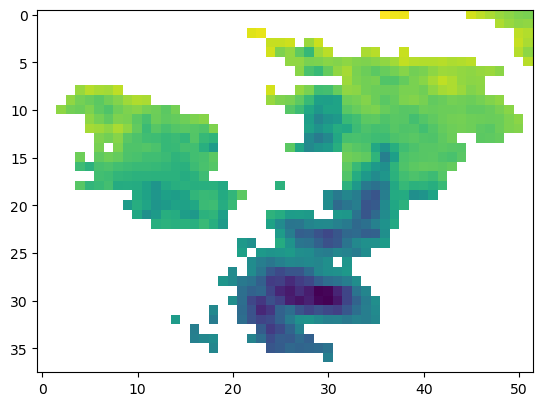

In [3]:
# matplotlib includes functions to plots 2D data
# imshow is the most basic one, displays the pixels in the 2D array
## Setup the figure
fig = plt.figure() # Create the figure
ax = plt.axes() # Create the axis 

## Add the graphics
p = ax.imshow(climato.tg) # Plot the temperature image

## Show
plt.show()

`pcolormesh` is an alternative technique that considers the coordinates of the data. It is still limited to rectilinear data, but is more adaptable for geospatial data.

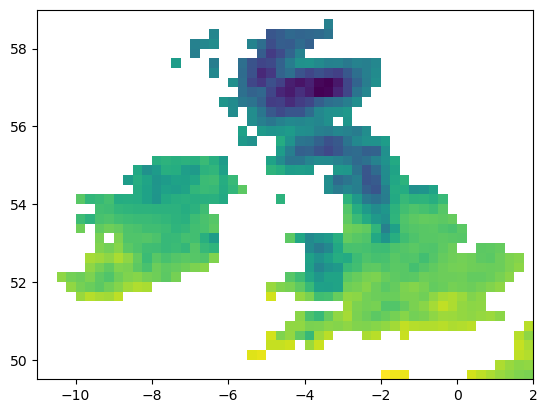

In [4]:
#pcolormesh is similar, but offers more flexibility
## Setup the figure
fig = plt.figure() # Create the figure
ax = plt.axes() # Create the axis 

## Add the graphics
p = ax.pcolormesh(
    climato.longitude, climato.latitude,  # coordinates
    climato.tg # 2D data
) 

## Show
plt.show()

`contour` is another approach to plotting data with coordinates. While pcolormesh will plot a continuous range of colours, contour will plot a sequence lines at user defined or automatically generated values. 

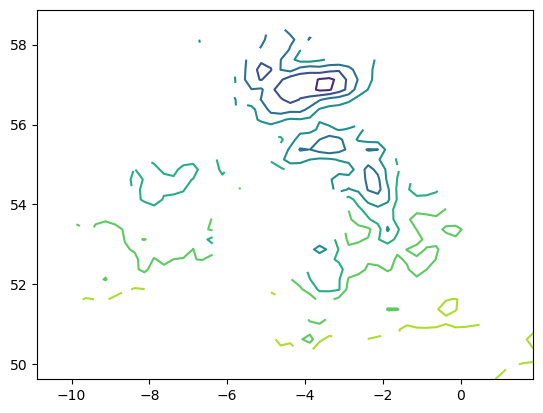

In [5]:
# Contours (not the best suited for this data with NaNs)
## Setup the figure
fig = plt.figure() # Create the figure
ax = plt.axes() # Create the axis 

## Add the graphics
p = ax.contour(climato.longitude, climato.latitude,  # coordinates
                  climato.tg # 2D data
                 ) 

## Show
plt.show()

`contourf` is similar to contour, but will fill the spaces between contour lines

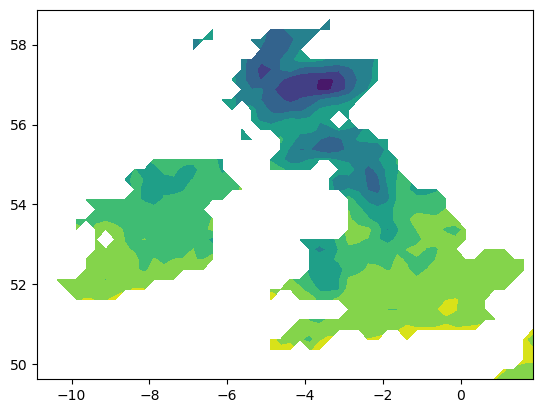

In [6]:
## Setup the figure
fig = plt.figure() # Create the figure
ax = plt.axes() # Create the axis 

## Add the graphics
p = ax.contourf(climato.longitude, climato.latitude,  # coordinates
                  climato.tg # 2D data
                 ) 

## Show
plt.show()

## 2. Create a map with cartopy
cartopy allows to create maps with projections using its `geoAxes` class. This works as a plugin to matplotlib, and handles most matplotlib plot styles automatically. We can create a geoAxes by providing the projection of the map we want when creating a matplotlib axis

In [7]:
# import cartopy crs (CRS: coordinate reference system)
import cartopy.crs as ccrs

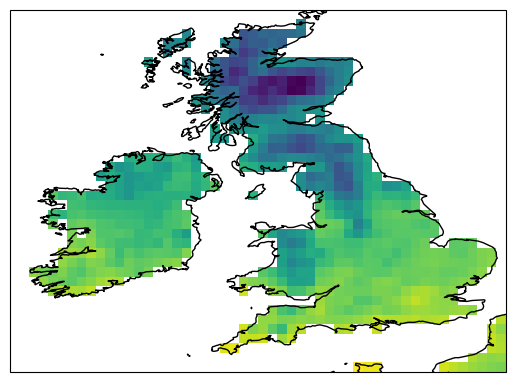

In [8]:
# Basic skeleton
## Setup the figure
fig = plt.figure() 
ax = plt.axes(projection = ccrs.PlateCarree()) # Add the projection in the axis creation

## Add the graphics
p = ax.pcolormesh(
    climato.longitude, climato.latitude, climato.tg,
) 

## Add the coastlines
ax.coastlines()

## Show
plt.show()

## 3. Transform data from one perspective to another
The basic projection for geoAxes is the PlateCarree, or a Euclidean lat/lon grid. But what if we want to plot our data on a different projection, or our data itself comes in a different projection? cartopy can handle this for you using the transform keyword:

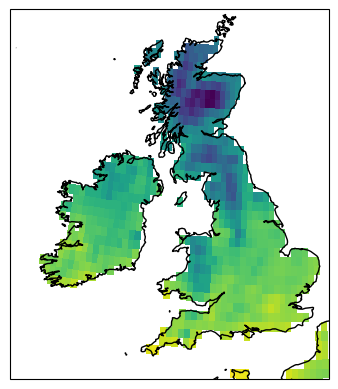

In [9]:
# Test other projections from https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html
## Setup the figure
fig = plt.figure() 
ax = plt.axes(projection = ccrs.NorthPolarStereo()) # Add the projection in the axis creation

## Add the graphics
p = ax.pcolormesh(
    climato.longitude, climato.latitude, climato.tg,
    transform = ccrs.PlateCarree(), # Add the transform in the plotting function. transform uses the original projection of the data
) 

## Add the coastlines
ax.coastlines()

## Show
plt.show()

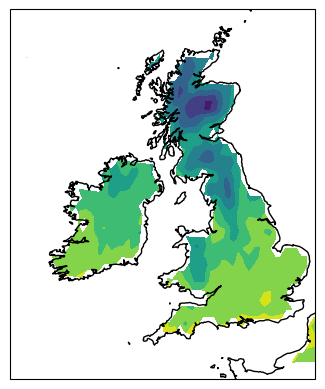

In [10]:
# You can then mix with different types of matplotlib plots
## Setup the figure
fig = plt.figure() 
ax = plt.axes(projection = ccrs.NorthPolarStereo()) # Add the projection in the axis creation

## Add the graphics
p = ax.contourf(climato.longitude, climato.latitude, climato.tg,
                  transform = ccrs.PlateCarree(), # Add the transform in the plotting function
                 ) 

## Add the coastlines
ax.coastlines()

## Show
plt.show()

## 4. Plot customization
cartopy provides a wide variety of ways to customise map plots beyond what is provided by matplotlib

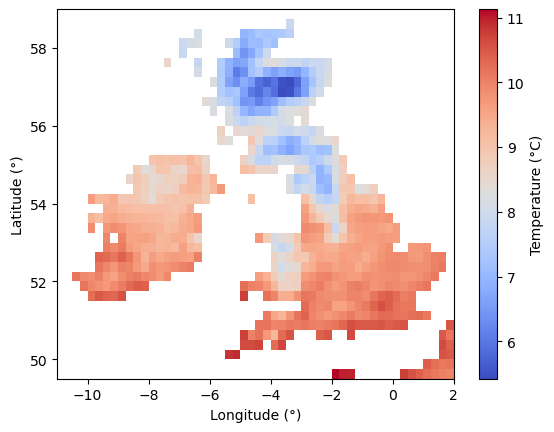

In [11]:
# Add a colorbar
## Setup the figure
fig = plt.figure() 
ax = plt.axes() 

## Add the graphics
p = ax.pcolormesh(climato.longitude, climato.latitude, climato.tg,
                  cmap = "coolwarm", # Change colormap
                 ) 

## Add colorbar
plt.colorbar(p, 
             label = "Temperature (°C)" # Add colorbar label
            )
## Customization
ax.set_xlabel("Longitude (°)")
ax.set_ylabel("Latitude (°)")

## Show
plt.show()

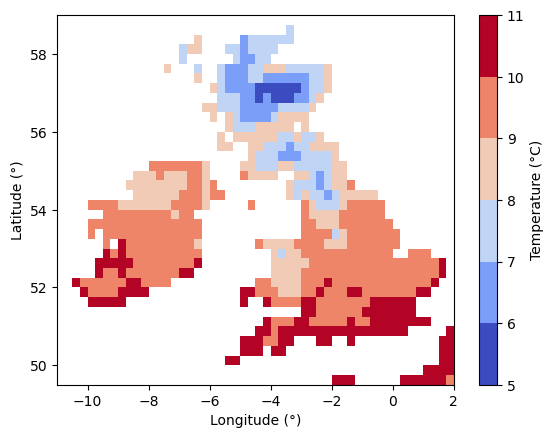

In [12]:
# Control colorbar levels with norm
from matplotlib.colors import BoundaryNorm

## Setup the figure
fig = plt.figure() 
ax = plt.axes() 

## Add the graphics
p = ax.pcolormesh(climato.longitude, climato.latitude, climato.tg,
                  cmap = "coolwarm", # Change colormap
                  norm = BoundaryNorm(np.arange(5,11.1,1), 256), # Set norm: BoundaryNorm allows for specifying discrete boundaries
                 ) 

## Add colorbar
plt.colorbar(p, 
             label = "Temperature (°C)" # Add colorbar label
            )
## Customization
ax.set_xlabel("Longitude (°)")
ax.set_ylabel("Latitude (°)")

## Show
plt.show()

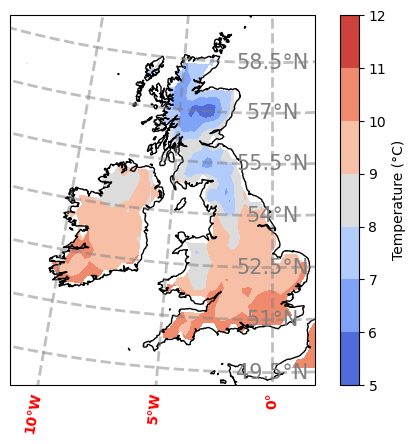

In [13]:
# Gridlines customizations (cartopy)
import matplotlib.ticker as mticker

## Setup the figure
fig = plt.figure() 
ax = plt.axes(projection = ccrs.NorthPolarStereo()) 

## Add the graphics
p = ax.contourf(climato.longitude, climato.latitude, climato.tg,
                  transform = ccrs.PlateCarree(), 
                  cmap = "coolwarm", 
                levels = 6, vmin = 5, vmax = 12, # With countourf, you can use norm, or simply specify the number of levels and boundaries
                 ) 

## Add colorbar
plt.colorbar(p, 
             label = "Temperature (°C)",
            )

## cartopy customization
ax.coastlines() 
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--', # Customize gridlines style
                 )
gl.top_labels = False # Hide longitude labels on top
gl.left_labels = False # Hide latitude labels on the left
gl.xlocator = mticker.FixedLocator([-10, -5, 0]) # Set position of longitude labels
gl.ylabel_style = {'size': 15, 'color': 'gray'} # Change the style of latitude labels
gl.xlabel_style = {'color': 'red', 'weight': 'bold'} # Change the style of longitude labels

## Show
plt.show()

/Users/jonesw/miniforge3/envs/iecdt_eda/lib/python3.10/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


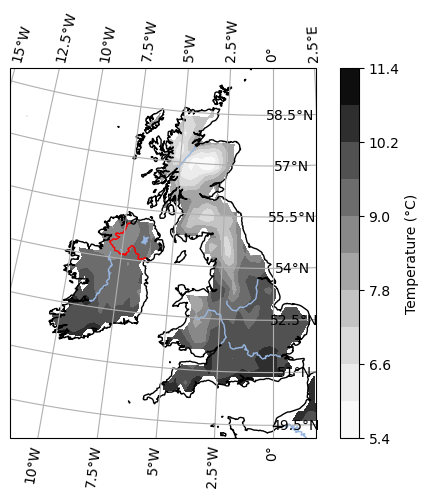

In [14]:
# Add pre-defined features
import cartopy.feature as cfeature

## Setup the figure
fig = plt.figure() 
ax = plt.axes(projection = ccrs.NorthPolarStereo()) 

## Add the graphics
p = ax.contourf(climato.longitude, climato.latitude, climato.tg,
                  transform = ccrs.PlateCarree(), 
                  cmap = "Greys", # Different colormap: Find all of them here: https://matplotlib.org/stable/users/explain/colors/colormaps.html
                levels = 10, 
                 ) 

## Add colorbar
plt.colorbar(p, label = "Temperature (°C)",)

## cartopy customization
ax.coastlines() 
ax.gridlines(draw_labels=True,)

## FEATURES
ax.add_feature(cfeature.RIVERS,)
ax.add_feature(cfeature.LAKES,)
ax.add_feature(cfeature.BORDERS, color = "red")
    
## Show
plt.show()

## Use cartopy with xarray's plot
Sometimes, you want to use xarray's quick plot function, but do need some of cartopy's functionnalities (e.g. coastlines, projections). Here is how to do it.

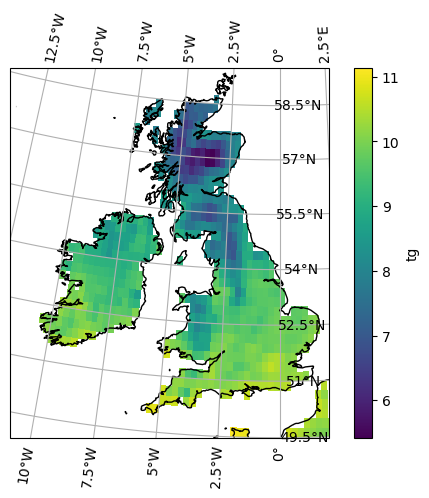

In [15]:
# Create your plot and call cartopy with subplot_kws
p = climato.tg.plot(
    subplot_kws = {"projection":ccrs.NorthPolarStereo()}, # Projection
    transform = ccrs.PlateCarree(), # Transform
)
# Customize by accessing p's axes :
p.axes.coastlines()
p.axes.gridlines(draw_labels = True)

## Your turn!
Create a map of precipitation. Try different projections, different colormaps, different norms. Don't forget all the appropriate labels. 

## Exercises
For each exercise, a figure is shown that you have to reproduce with some clues. Solutions are provided in a separate notebook. Note that there may be several ways to do one thing, so if you did not do as in the solution but got the same plot, well done!

### Level 1
<img src="examples/maps_level1.png" style="width: 1000px;"/>

In [16]:
# Data for plotting 
delta = 0.2
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

# Create figure with three subplots (figsize = [14,4])

# In the first one, plot the data with pcolormesh and a colorbar (uncomment suggested code)
#p = axs[0].pcolormesh(X,Y,Z)
#plt.colorbar(p)
#axs[0].set_title("pcolormesh")

# In the second one, plot the data with contourf and a colorbar

# In the third one, plot the data with contour and a colorbar

# Title

# Save and show
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

### Level 2
<img src="examples/maps_level2.png" style="width: 600px;"/>

* matplotlib clabel : https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.clabel.html
* matplotlib contour : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html

In [17]:
# Inspired from: https://matplotlib.org/stable/gallery/images_contours_and_fields/contour_demo.html#sphx-glr-gallery-images-contours-and-fields-contour-demo-py

# Data for plotting 
delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

# Create axes

# Plot contour with labels

# Title

# Save and show
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

### Level 3
<img src="examples/maps_level3.png" style="width: 600px;"/>

* matplotlib contourf : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html

In [18]:
# Data for plotting 
delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

# Create axes

# Plot contour with labels (colormap is PiYG)

# Title

# Save and show
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

### Level 4
<img src="examples/maps_level4.png" style="width: 600px;"/>

* https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.BoundaryNorm.html
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html

In [19]:
from matplotlib.colors import BoundaryNorm

# Data for plotting 
delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

# Create axes

# Plot contour with labels

# Title

# Save and show
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

### Level 5
<img src="examples/maps_level5.png" style="width: 600px;"/>

* https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.colorbar.html#matplotlib.figure.Figure.colorbar

In [20]:
# Data for plotting
nlats, nlons = (73,145)
lats = np.linspace(-np.pi / 2, np.pi / 2, nlats)
lons = np.linspace(0, 2 * np.pi, nlons)
lons, lats = np.meshgrid(lons, lats)
wave = 0.75 * (np.sin(2 * lats) ** 8) * np.cos(4 * lons)
mean = 0.5 * np.cos(2 * lats) * ((np.sin(2 * lats)) ** 2 + 2)

lats = np.rad2deg(lats)
lons = np.rad2deg(lons)
data = wave + mean

# Create the axes

# Plot the data (colormap is Spectral)

# Add colorbar with 0.5 shrink level

# Add coastlines 

# Add title 

# Save and show
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

### Level 6
<img src="examples/maps_level6.png" style="width: 600px;"/>

* https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html

In [21]:
# From https://scitools.org.uk/cartopy/docs/v0.16/gallery/waves.html#sphx-glr-gallery-waves-py

# Data for plotting
nlats, nlons = (73,145)
lats = np.linspace(-np.pi / 2, np.pi / 2, nlats)
lons = np.linspace(0, 2 * np.pi, nlons)
lons, lats = np.meshgrid(lons, lats)
wave = 0.75 * (np.sin(2 * lats) ** 8) * np.cos(4 * lons)
mean = 0.5 * np.cos(2 * lats) * ((np.sin(2 * lats)) ** 2 + 2)

lats = np.rad2deg(lats)
lons = np.rad2deg(lons)
data = wave + mean

# Create the axes (projection: Mollweide centered on -25 longitude)

# Plot the data (colormap: Spectral)

# Add coastlines 
ax.coastlines()

# Crop the map using set_extent with [-100, 50, 20, 60]

# Add title 

# Save and show
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>